In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

import pickle as pk
from time import time

/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in data
start=time()
print('reading in data...')
with open('data_all.pk','rb') as fp:
    foo = pk.load(fp)
print('elapsed: ',time()-start)

for x in foo:
    stmp = x+"= foo['"+x+"']"
    exec(stmp)

reading in data...
elapsed:  6.780831813812256


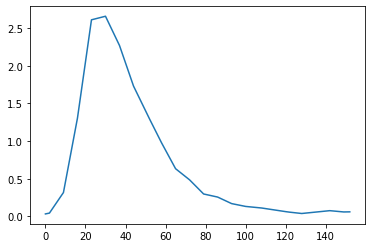

In [3]:
plt.plot(clusdata_all['deaths']['Germany']);

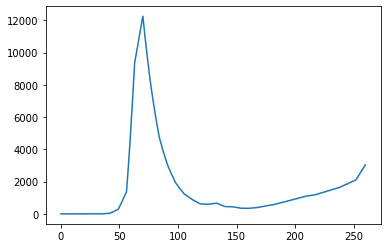

In [4]:
plt.plot(new_cases_c_nonlinr_owid['Germany']);

# Consensus basics

In [6]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.

In [27]:
exec(open('Consensus.py','r').read())

In [28]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
foo = Consensus()

In [30]:
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [10]:
# import warnings
# warnings.simplefilter('error', RuntimeWarning)   # to replace warnings by errors to allow traceback
# warnings.simplefilter('error',DeprecationWarning)

In [29]:
# loop over 24 scans: 4* cases index + scoring method (max validity or min score options) 0 to 3:
# 0 validity = max(validity,0.001)
# 1 validitysc = rescale(validity,ncomp)  # rescaled to account for biasses in number of components of projection
# 2 score1 = 1.0/validitysc + float(nunclustered)/5. + np.abs(float(nclus)-4.)/2.  # penalizes additively
# 3 score2 = float(nunclustered)*(4.+np.abs(nclus-4.))/(validitysc*20.)            # penalizes multiplicatively : all criteria required
foo.scan() # default diag=False for no output except progress bar


making clusters...
reference clustering (numbered from 0) is 7
swizzling


In [12]:
len(foo.report)

24

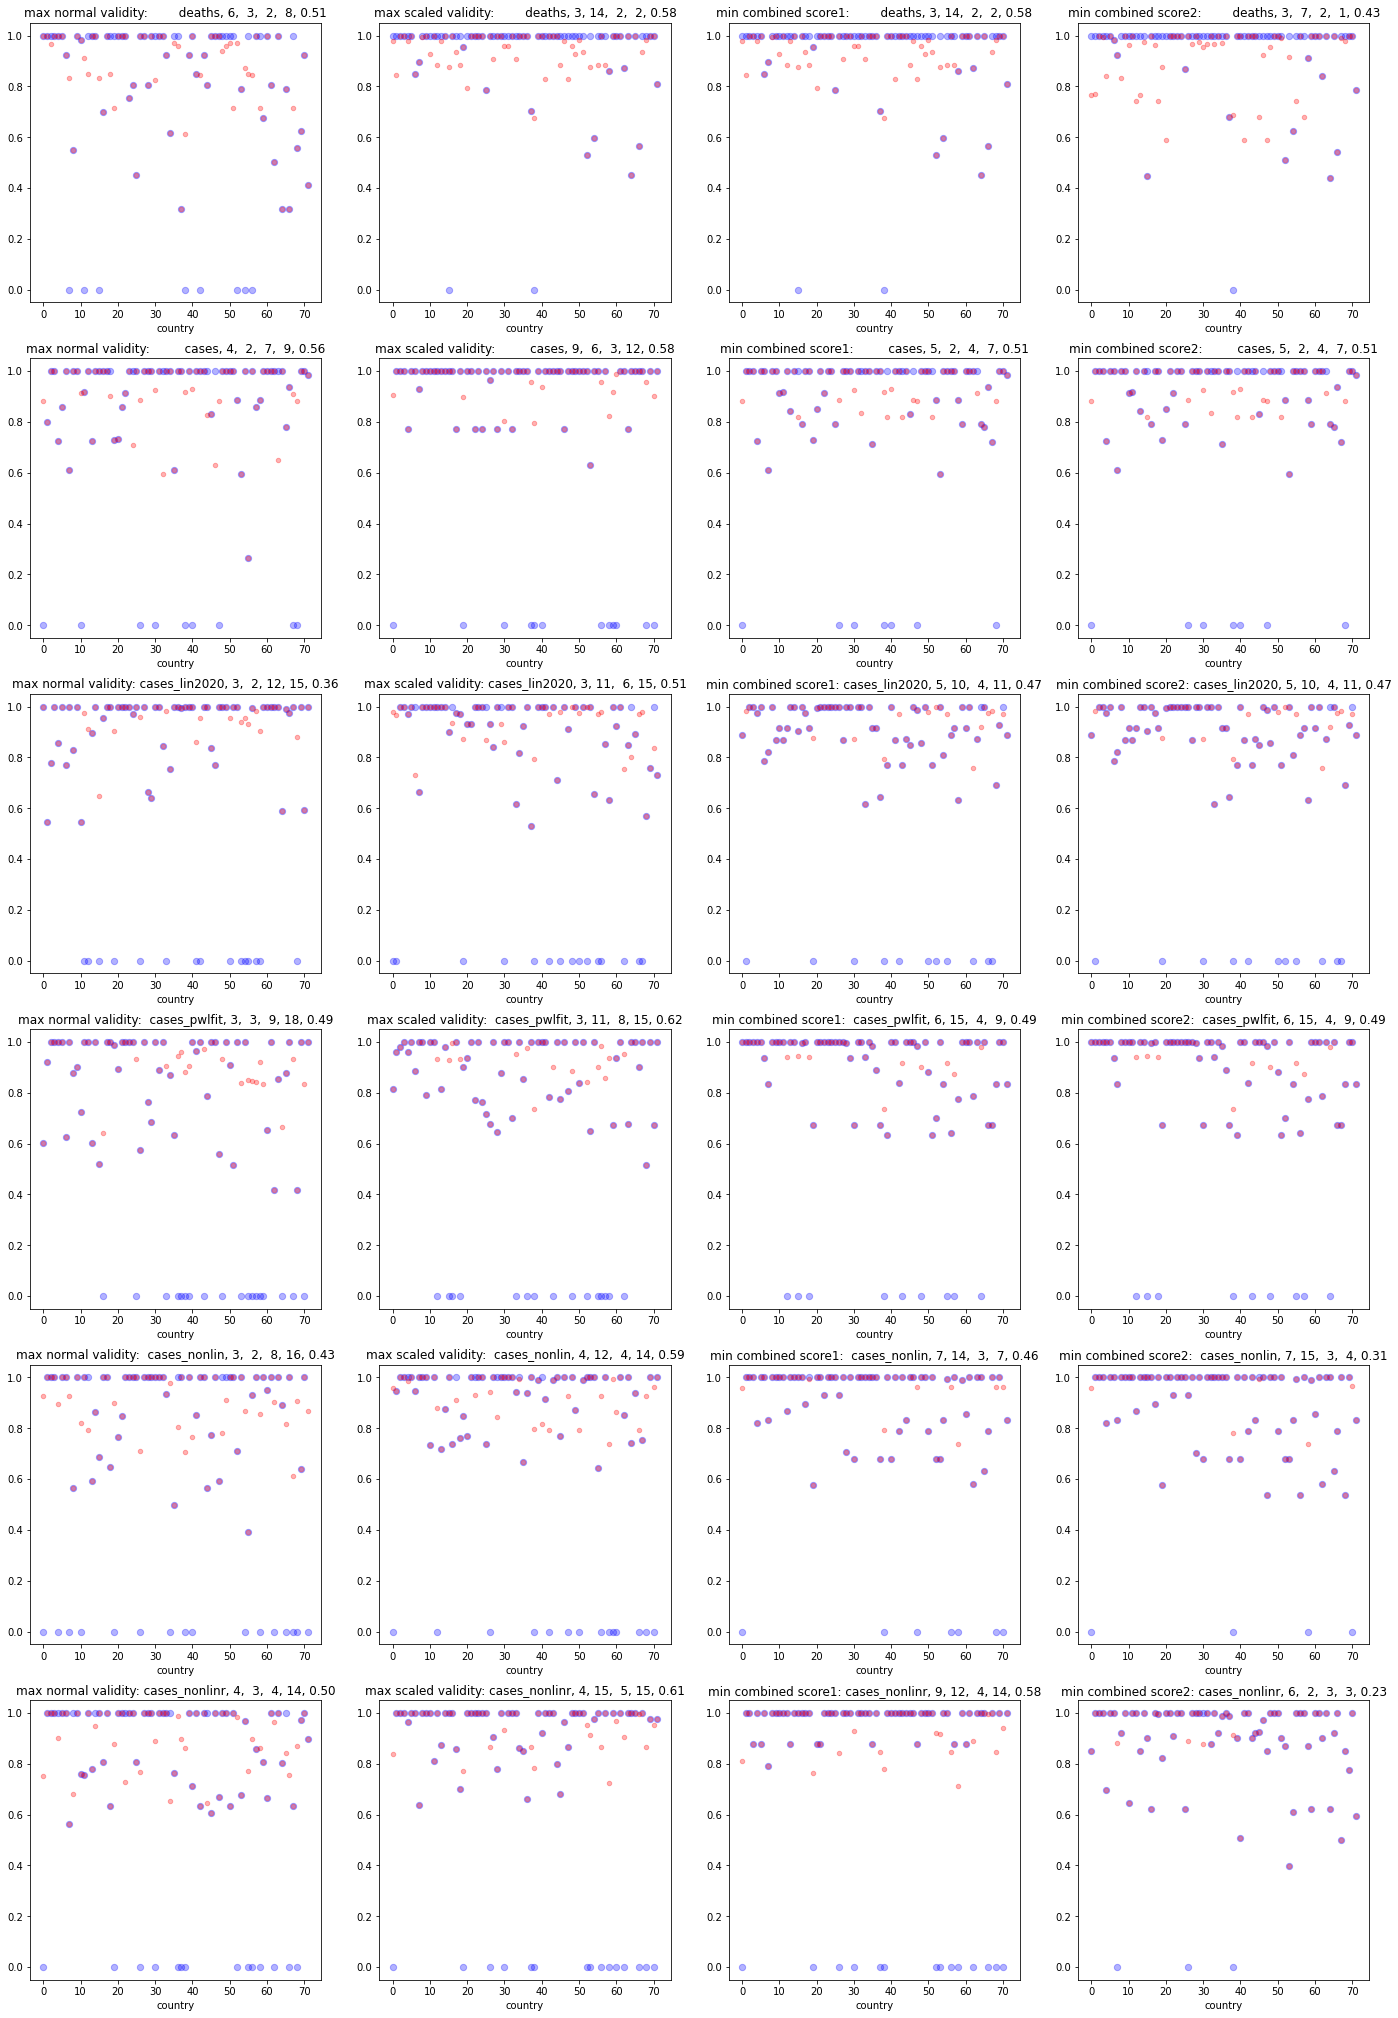

In [9]:
# plot of probability of countries being in cluster (blue) and 1- outlier score (red)
# extracted to paper figure in Assembled_Figs.pptx
foo.plot_outliers()

**Must do this to graph any of the clusterings...**

In [10]:
foo.make_clusters()

reference clustering (numbered from 0) is 7


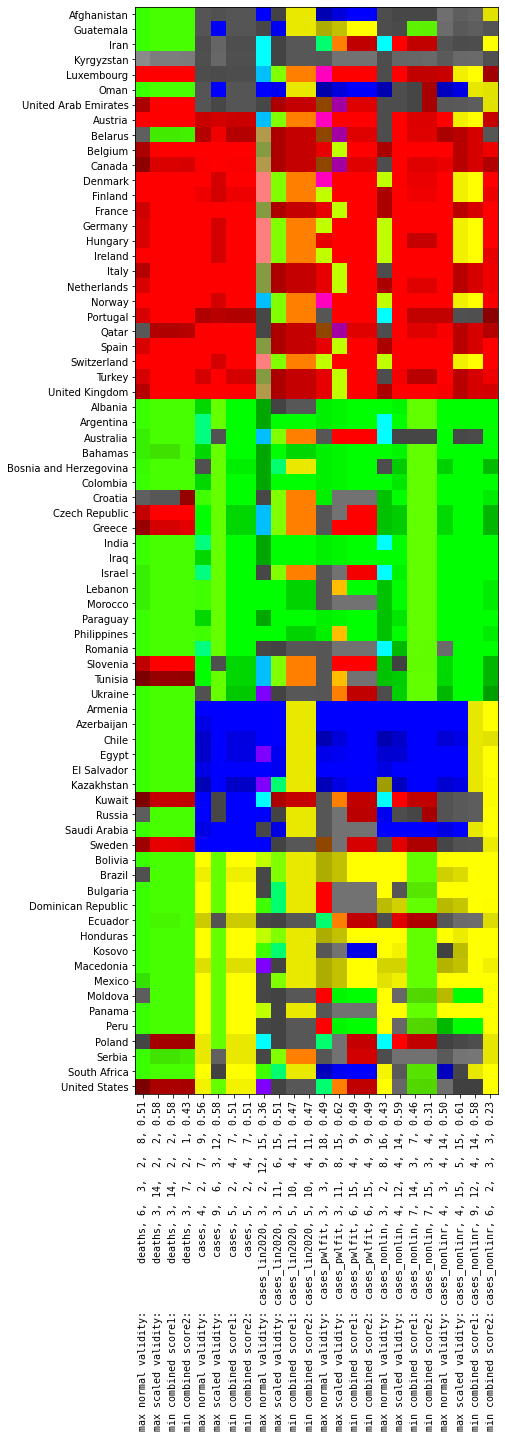

In [11]:
foo.plot_stage(3)

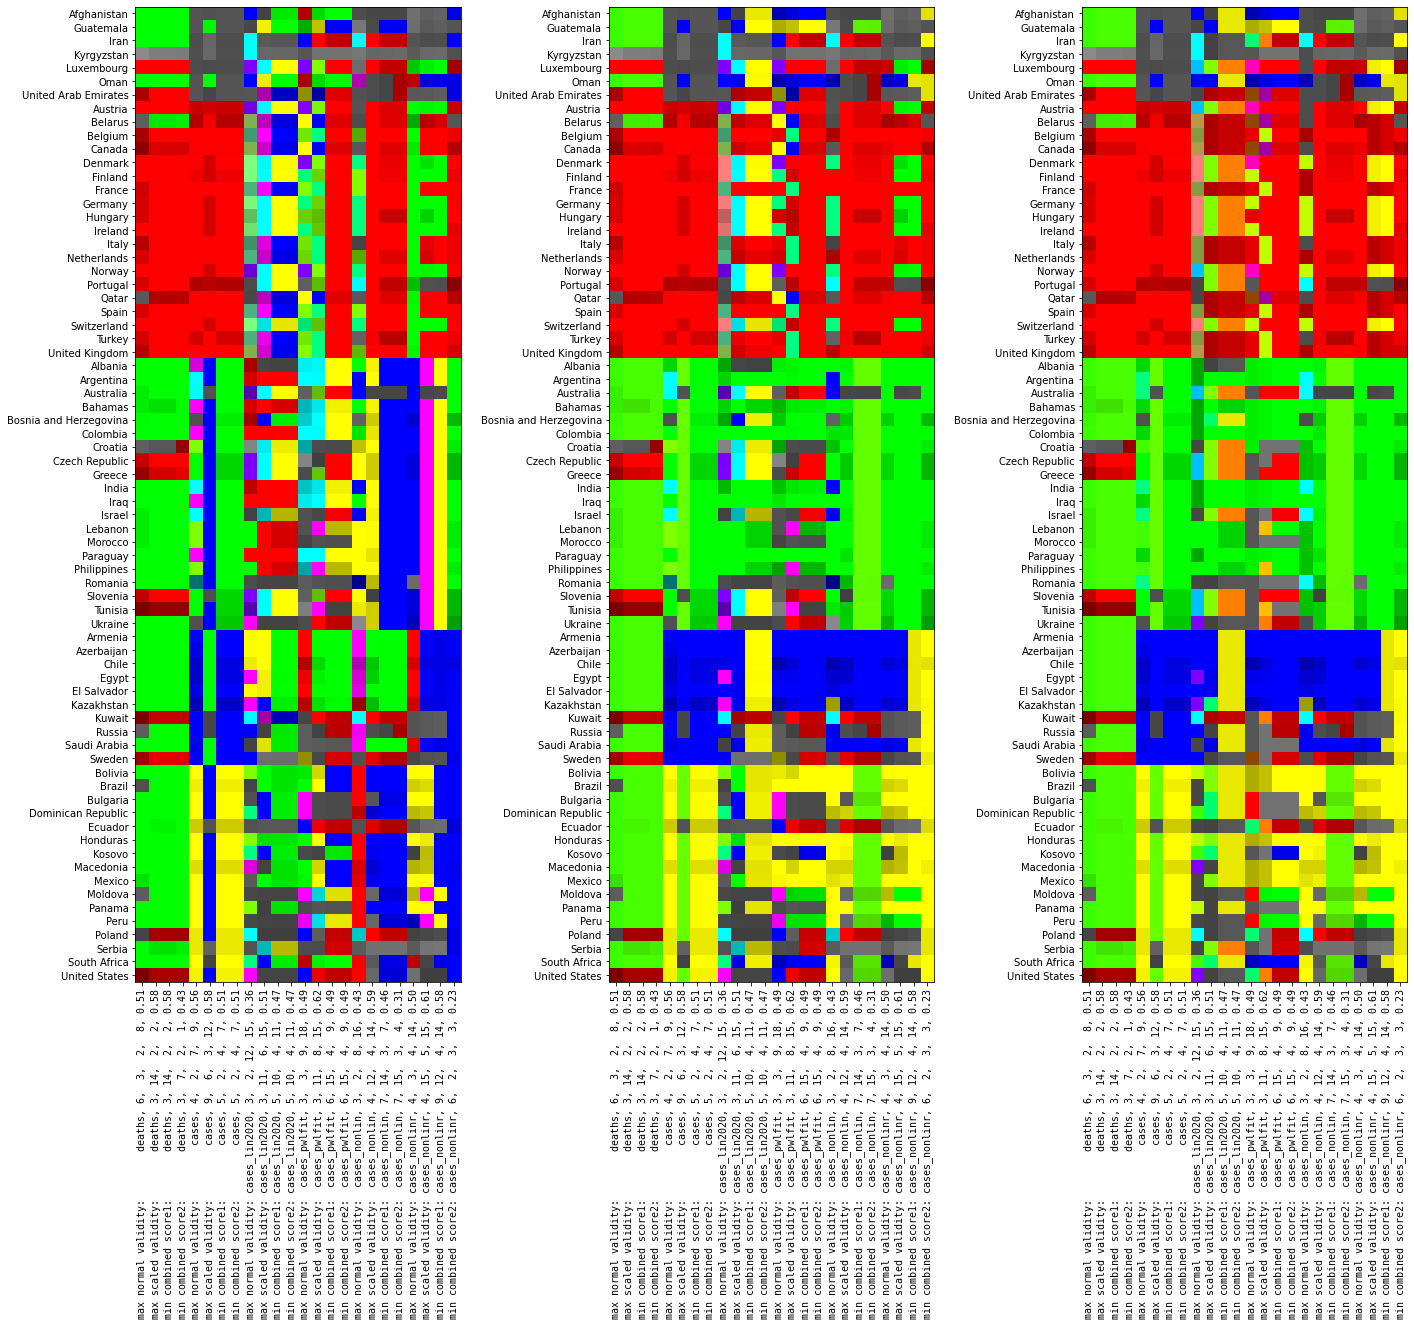

In [12]:
# the end result here is with the countries ordered by the refclustering column (the one with the best score2)
# see swizzle below to reorder countries by means of the consensus clusters
foo.plot_all_stages()

In [40]:
foo.swizzle(satthresh=0.7) # the closer the satthresh to one, the more countries end up in unclustered
print(len(foo.classes))
print(foo.classes)

72
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


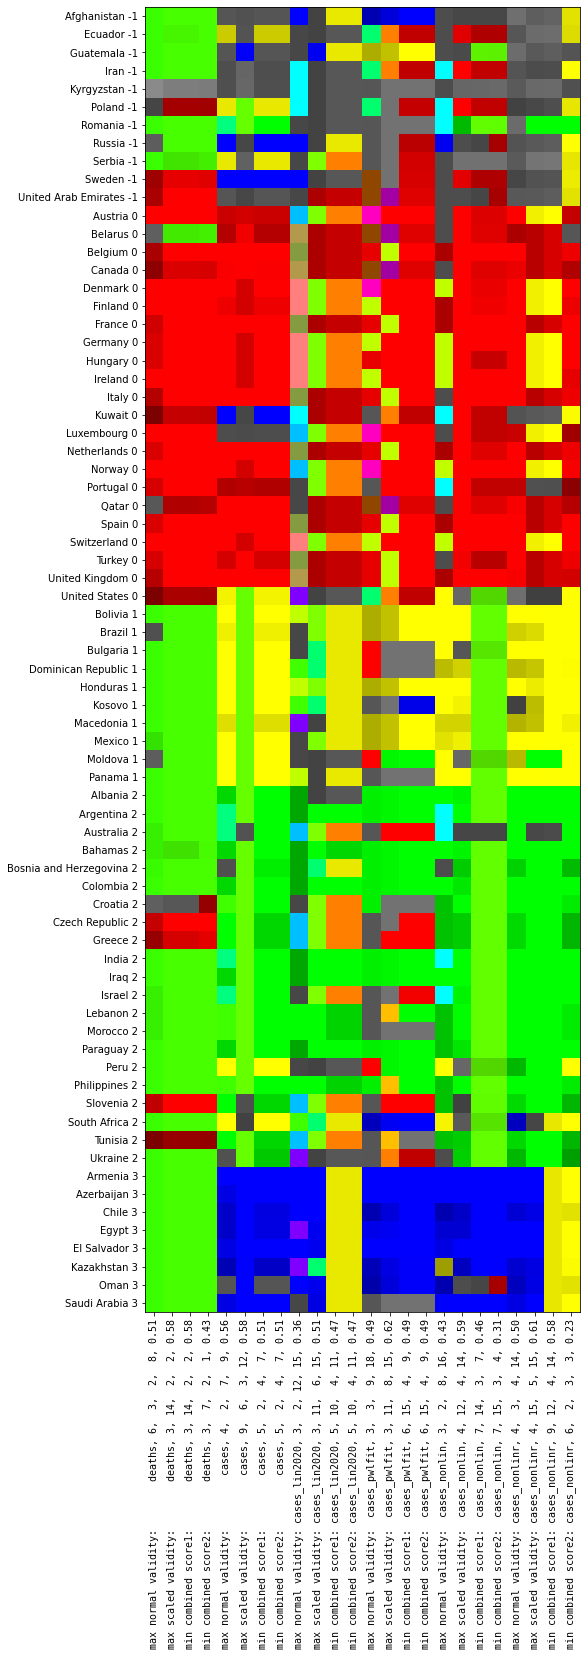

In [41]:
foo.plot_swiz()


In [42]:
foo.make_map()

In [43]:
foo.map

Map(center=[20, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

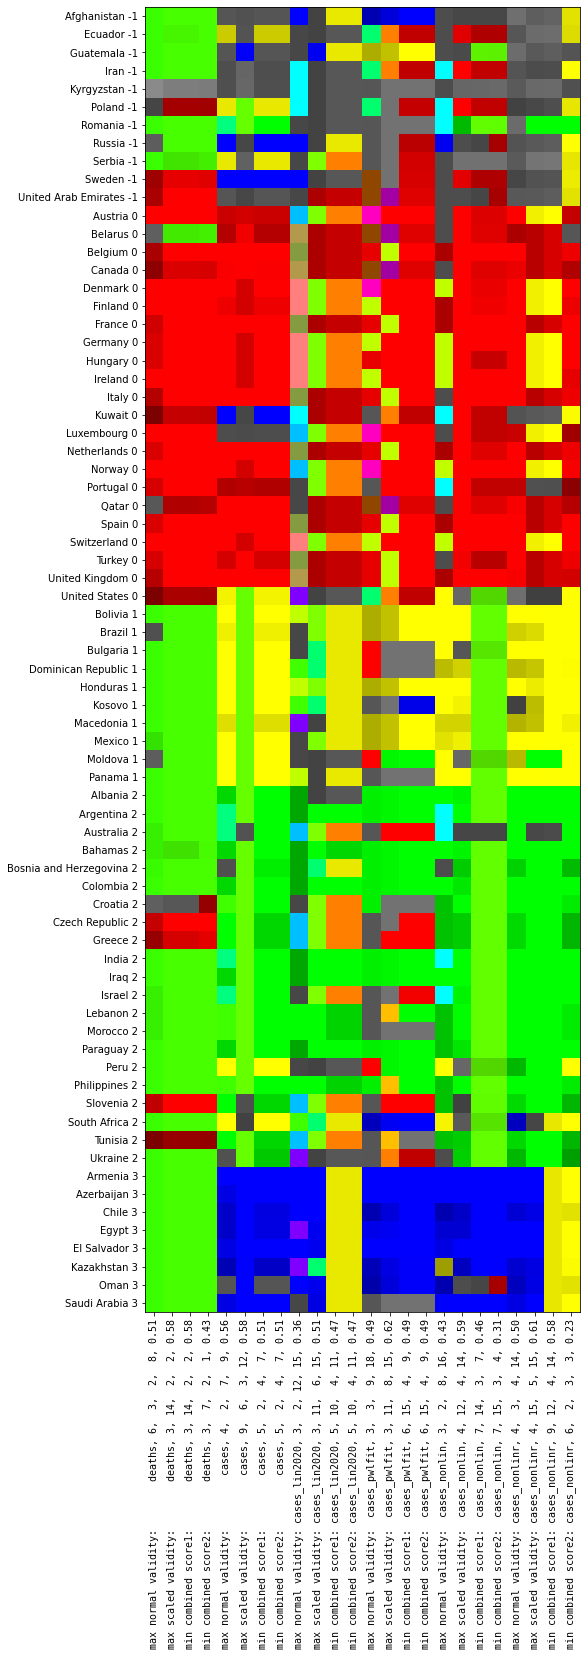

In [44]:
foo.plot_swiz()

In [16]:
foo.refclustering

7